In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
plt.style.use('seaborn-white')

In [2]:
#Importing songs for project
#songs to classify
songs_to_classify = pd.read_csv('/Users/markusskogsmo/Desktop/Statistisk Maskininlärning/datasets/songs_to_classify.csv')
#training data
training_data = pd.read_csv('/Users/markusskogsmo/Desktop/Statistisk Maskininlärning/datasets/training_data.csv')


In [3]:
# Look at the column names in the data frame
print("Info about set of songs to classify")
songs_to_classify.info()
print(" ")
print("Info about training set")
training_data.info()

Info about set of songs to classify
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
acousticness        200 non-null float64
danceability        200 non-null float64
duration            200 non-null int64
energy              200 non-null float64
instrumentalness    200 non-null float64
key                 200 non-null int64
liveness            200 non-null float64
loudness            200 non-null float64
mode                200 non-null int64
speechiness         200 non-null float64
tempo               200 non-null float64
time_signature      200 non-null int64
valence             200 non-null float64
dtypes: float64(9), int64(4)
memory usage: 20.4 KB
 
Info about training set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
acousticness        750 non-null float64
danceability        750 non-null float64
duration            750 non-null int64
energy              750 non-nul

In [4]:
# See a statistical summary
# Look at the column names in the data frame
print("Statistics about set of songs to classify")
songs_to_classify.describe()

Statistics about set of songs to classify


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000
mean,0.313594,0.574293,225403.545000,0.614639,0.077213,4.875000,0.213929,-8.081180,0.690000,0.108463,120.464460,3.9300,0.509624
std,0.315897,0.173536,63370.667433,0.240442,0.230853,3.624231,0.163076,4.512864,0.463654,0.137135,30.196179,0.4195,0.240324
min,0.000001,0.082600,59305.000000,0.011500,0.000000,0.000000,0.028500,-32.783000,0.000000,0.025200,47.193000,1.0000,0.038400
25%,0.036750,0.448750,185316.750000,0.451500,0.000000,1.750000,0.104750,-9.337000,0.000000,0.035100,96.239750,4.0000,0.308500
50%,0.205000,0.582000,222930.000000,0.655000,0.000009,5.000000,0.151000,-7.050000,1.000000,0.046600,120.040500,4.0000,0.497500
75%,0.541500,0.704250,258739.750000,0.811000,0.001125,8.000000,0.274500,-5.221500,1.000000,0.107750,136.127750,4.0000,0.686000
max,0.991000,0.923000,414987.000000,0.976000,0.942000,11.000000,0.961000,-1.887000,1.000000,0.869000,219.983000,5.0000,0.973000


In [5]:
# See a statistical summary
# Look at the column names in the data frame
print("Statistics about training set")
training_data.describe()

Statistics about training set


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [61]:
#Divide set into training and testing randomly, sampling indices for training
# Size of test set
size = 250

trainI = np.random.choice(training_data.shape[0], size, replace=False)
trainIndex = training_data.index.isin(trainI)
train = training_data.iloc[trainIndex] # training set
test = training_data.iloc[~trainIndex] # test set

In [62]:
#  
model = skl_lm.LogisticRegression()
X_train = train[['acousticness','danceability','duration',
                'energy','instrumentalness','key','liveness',
                'loudness','mode','speechiness','tempo','time_signature',
                'valence','label']]
Y_train = train['label']
X_test = test[['acousticness','danceability','duration',
                'energy','instrumentalness','key','liveness',
                'loudness','mode','speechiness','tempo','time_signature',
                'valence','label']]
Y_test = test['label']
model.fit(X_train, Y_train)
print('Model summary:')
print(model)

Model summary:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [63]:
model = skl_nb.KNeighborsClassifier(n_neighbors=27)
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

In [64]:
prediction = model.predict(X_test)
print(pd.crosstab(prediction, Y_test))
np.mean(prediction == Y_test)

label    0    1
row_0          
0       36   38
1      172  254


0.58

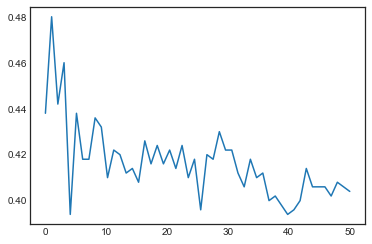

In [65]:
misclassification = []
start = 0
stop = 50
for k in range(start,stop,1): # Try n_neighbors = 1, 2, ...., 50
    model = skl_nb.KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    misclassification.append(np.mean(prediction != Y_test))


K = np.linspace(start, stop, stop-start)
plt.plot(K, misclassification)
plt.show()


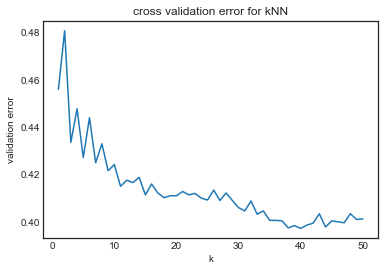

In [94]:
k_test = 50
t_run = 10
size = 250 # Size of test set
misclassification = np.zeros((t_run, k_test))
for i in range(t_run):
    trainIndex = np.random.choice(training_data.shape[0], size, replace=False) 
    train = training_data.iloc[trainIndex] # training set 
    validation = training_data.iloc[~training_data.index.isin(trainIndex)]
    X_train = train[['acousticness','danceability','duration','energy','instrumentalness','key','liveness',
        'loudness','mode','speechiness','tempo','time_signature','valence']]
    Y_train = train['label']
    X_validation = validation[['acousticness','danceability','duration','energy','instrumentalness','key','liveness',
        'loudness','mode','speechiness','tempo','time_signature','valence']]
    Y_validation = validation['label']
    for k in range(k_test): # Try n_neighbors 
        model = skl_nb.KNeighborsClassifier(n_neighbors=k+1) 
        model.fit(X_train, Y_train)
        prediction = model.predict(X_validation)
        misclassification[i, k] = (np.mean(prediction != Y_validation))
    
average_mis = np.mean(misclassification, axis=0)
K = np.linspace(1, k_test, k_test)
plt.plot(K, average_mis)
plt.title('cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('validation error')
plt.show()


